# # Knowledge Representation & Reasoning: Coffee Pest Management System
# 
# **Group 11**
# **Members**: Joakim Kiugi, Kepha Mirera, Loren Biden and Tabitha Wangari.
# **Course**: Knowledge Representation and Reasoning
# 
# ## 1. Introduction
# 
# This notebook implements a formal Knowledge Base system for coffee pest management using:
# - First-Order Logic (FOL) representations
# - Semantic Network / Ontology
# - Rule-based reasoning
# - Interactive decision support

In [16]:
import pandas as pd
from dataclasses import dataclass
from typing import List, Dict, Set, Optional
from enum import Enum
import networkx as nx
import matplotlib.pyplot as plt

2. Formal Ontology Definition

In [17]:
class PestType(Enum):
    INSECT = "Insect"
    FUNGUS = "Fungus"
    MITES = "Mites"
    BACTERIA = "Bacteria"

class ControlType(Enum):
    CULTURAL = "Cultural"
    BIOLOGICAL = "Biological" 
    CHEMICAL = "Chemical"
    MECHANICAL = "Mechanical"

class Severity(Enum):
    LOW = "Low"
    MEDIUM = "Medium"
    HIGH = "High"

class SafetyLevel(Enum):
    VERY_SAFE = "Very Safe"
    MODERATE = "Moderate"
    DANGEROUS = "Dangerous"
    VERY_DANGEROUS = "Very Dangerous"

In [18]:
@dataclass
class Pest:
    name: str
    pest_type: PestType
    description: str
    symptoms: List[str]
    affected_parts: List[str]
    life_cycle: str
    
    def __hash__(self):
        return hash(self.name)

@dataclass
class Pesticide:
    name: str
    target_pests: List[str]
    control_type: ControlType
    active_ingredient: str
    safety_level: SafetyLevel
    re_entry_interval: int  # days
    pre_harvest_interval: int  # days
    toxicity_notes: str
    
    def __hash__(self):
        return hash(self.name)

@dataclass
class ControlMethod:
    name: str
    control_type: ControlType
    description: str
    target_pests: List[str]
    effectiveness: Severity
    cost: Severity

3. Knowledge Base Instantiation

In [19]:
class CoffeePestKnowledgeBase:
    def __init__(self):
        self.pests = {}
        self.pesticides = {}
        self.control_methods = {}
        self.semantic_network = nx.MultiDiGraph()
        self._initialize_knowledge_base()
    
    def _initialize_knowledge_base(self):
        self._initialize_pests()
        self._initialize_pesticides() 
        self._initialize_control_methods()
        self._build_semantic_network()
    
    def _initialize_pests(self):
        # Major coffee pests
        self.pests = {
            "coffee_berry_borer": Pest(
                name="Coffee Berry Borer",
                pest_type=PestType.INSECT,
                description="Small beetle that bores into coffee berries",
                symptoms=["Small holes in berries", "Berry drop", "Reduced yield"],
                affected_parts=["Berry", "Bean"],
                life_cycle="Egg -> Larva -> Pupa -> Adult (35-45 days)"
            ),
            "coffee_leaf_rust": Pest(
                name="Coffee Leaf Rust", 
                pest_type=PestType.FUNGUS,
                description="Fungal disease causing orange powdery spots",
                symptoms=["Orange powder on leaf underside", "Leaf yellowing", "Defoliation"],
                affected_parts=["Leaf"],
                life_cycle="Spore germination -> Infection -> Sporulation"
            ),
            "coffee_leaf_miner": Pest(
                name="Coffee Leaf Miner",
                pest_type=PestType.INSECT, 
                description="Moth larvae that mine inside leaves",
                symptoms=["Winding tunnels in leaves", "Leaf necrosis", "Reduced photosynthesis"],
                affected_parts=["Leaf"],
                life_cycle="Egg -> Larva (miner) -> Pupa -> Adult"
            )
        }
    
    def _initialize_pesticides(self):
        self.pesticides = {
            "beauveria_bassiana": Pesticide(
                name="Beauveria bassiana",
                target_pests=["coffee_berry_borer"],
                control_type=ControlType.BIOLOGICAL,
                active_ingredient="Beauveria bassiana fungus",
                safety_level=SafetyLevel.VERY_SAFE,
                re_entry_interval=0,
                pre_harvest_interval=0,
                toxicity_notes="Safe for humans, bees, and beneficial insects"
            ),
            "copper_hydroxide": Pesticide(
                name="Copper Hydroxide",
                target_pests=["coffee_leaf_rust"],
                control_type=ControlType.CHEMICAL,
                active_ingredient="Copper hydroxide",
                safety_level=SafetyLevel.MODERATE,
                re_entry_interval=1,
                pre_harvest_interval=7,
                toxicity_notes="Toxic to fish, moderate human toxicity"
            ),
            "cypermethrin": Pesticide(
                name="Cypermethrin",
                target_pests=["coffee_berry_borer", "coffee_leaf_miner"],
                control_type=ControlType.CHEMICAL,
                active_ingredient="Cypermethrin",
                safety_level=SafetyLevel.DANGEROUS,
                re_entry_interval=3,
                pre_harvest_interval=14,
                toxicity_notes="Highly toxic to bees and aquatic life"
            )
        }
    
    def _initialize_control_methods(self):
        self.control_methods = {
            "harvest_hygiene": ControlMethod(
                name="Harvest Hygiene",
                control_type=ControlType.CULTURAL,
                description="Remove all berries during harvest including fallen ones",
                target_pests=["coffee_berry_borer"],
                effectiveness=Severity.HIGH,
                cost=Severity.LOW
            ),
            "shade_management": ControlMethod(
                name="Shade Management", 
                control_type=ControlType.CULTURAL,
                description="Maintain proper shade levels to reduce humidity",
                target_pests=["coffee_leaf_rust"],
                effectiveness=Severity.MEDIUM,
                cost=Severity.LOW
            ),
            "biological_control": ControlMethod(
                name="Biological Control",
                control_type=ControlType.BIOLOGICAL,
                description="Conserve natural enemies like parasitic wasps",
                target_pests=["coffee_leaf_miner"],
                effectiveness=Severity.MEDIUM, 
                cost=Severity.LOW
            )
        }
    
    def _build_semantic_network(self):
        # Add nodes for all entities
        for pest_id, pest in self.pests.items():
            self.semantic_network.add_node(pest_id, type='pest', label=pest.name)
        
        for pesticide_id, pesticide in self.pesticides.items():
            self.semantic_network.add_node(pesticide_id, type='pesticide', label=pesticide.name)
        
        for method_id, method in self.control_methods.items():
            self.semantic_network.add_node(method_id, type='method', label=method.name)
        
        # Add relationships
        for pesticide_id, pesticide in self.pesticides.items():
            for target_pest in pesticide.target_pests:
                self.semantic_network.add_edge(
                    pesticide_id, target_pest, 
                    relationship='controls',
                    safety=pesticide.safety_level.value
                )
        
        for method_id, method in self.control_methods.items():
            for target_pest in method.target_pests:
                self.semantic_network.add_edge(
                    method_id, target_pest,
                    relationship='controls', 
                    type=method.control_type.value
                )

4. First-Order Logic Rules

In [20]:
class PestManagementLogic:
    def __init__(self, knowledge_base):
        self.kb = knowledge_base
    
    # FOL Rule 1: ∀pest ∀control (Pest(pest) ∧ Controls(control, pest) ∧ Safe(control) → RecommendedFirst(control))
    def recommend_safe_first(self, pest_id):
        """Safe-first recommendation: Prefer biological and cultural controls"""
        recommendations = []
        
        # Check control methods first (non-chemical)
        for method_id, method in self.kb.control_methods.items():
            if pest_id in method.target_pests:
                recommendations.append({
                    'type': 'method',
                    'id': method_id,
                    'name': method.name,
                    'control_type': method.control_type,
                    'safety': SafetyLevel.VERY_SAFE,
                    'reasoning': f"FOL Rule: Safe control method for {pest_id}"
                })
        
        # Then check biological pesticides
        for pesticide_id, pesticide in self.kb.pesticides.items():
            if (pest_id in pesticide.target_pests and 
                pesticide.control_type == ControlType.BIOLOGICAL):
                recommendations.append({
                    'type': 'pesticide',
                    'id': pesticide_id,
                    'name': pesticide.name,
                    'control_type': pesticide.control_type,
                    'safety': pesticide.safety_level,
                    'reasoning': f"FOL Rule: Biological control for {pest_id}"
                })
        
        return recommendations
    
    # FOL Rule 2: ∀pesticide ∀pest (Pesticide(pesticide) ∧ Controls(pesticide, pest) ∧ Dangerous(pesticide) → LastResort(pesticide))
    def recommend_last_resort(self, pest_id):
        """Chemical controls as last resort"""
        recommendations = []
        
        for pesticide_id, pesticide in self.kb.pesticides.items():
            if (pest_id in pesticide.target_pests and 
                pesticide.control_type == ControlType.CHEMICAL):
                recommendations.append({
                    'type': 'pesticide',
                    'id': pesticide_id,
                    'name': pesticide.name,
                    'control_type': pesticide.control_type,
                    'safety': pesticide.safety_level,
                    'reasoning': f"FOL Rule: Chemical control (last resort) for {pest_id}"
                })
        
        return recommendations
    
    # FOL Rule 3: ∀symptoms ∃pest (Exhibits(pest, symptoms) → Identified(pest))
    def diagnose_from_symptoms(self, symptoms):
        """Diagnose pest based on symptoms"""
        matches = {}
        
        for pest_id, pest in self.kb.pests.items():
            symptom_matches = [s for s in symptoms if any(symptom in s.lower() for symptom in [s.lower() for s in pest.symptoms])]
            if symptom_matches:
                matches[pest_id] = {
                    'pest': pest,
                    'matching_symptoms': symptom_matches,
                    'confidence': len(symptom_matches) / len(pest.symptoms)
                }
        
        return matches

5. Interactive Reasoning System

In [21]:
class InteractivePestAdvisor:
    def __init__(self):
        self.kb = CoffeePestKnowledgeBase()
        self.logic = PestManagementLogic(self.kb)
    
    def display_knowledge_base_summary(self):
        """Display summary of the knowledge base"""
        print("=== COFFEE PEST KNOWLEDGE BASE ===")
        print(f"Pests: {len(self.kb.pests)}")
        print(f"Pesticides: {len(self.kb.pesticides)}") 
        print(f"Control Methods: {len(self.kb.control_methods)}")
        print()
        
        print("Available Pests:")
        for pest_id, pest in self.kb.pests.items():
            print(f"  - {pest.name} ({pest.pest_type.value})")
    
    def diagnose_and_recommend(self):
        """Interactive diagnosis and recommendation system"""
        print("\n=== PEST DIAGNOSIS AND RECOMMENDATION SYSTEM ===")
        
        # Get symptoms from user
        print("\nDescribe the symptoms you're observing (comma-separated):")
        print("Example: holes in berries, orange powder on leaves, leaf mining")
        symptoms_input = input("Symptoms: ").strip()
        
        if not symptoms_input:
            print("No symptoms provided. Using default example.")
            symptoms = ["holes in berries", "berry drop"]
        else:
            symptoms = [s.strip().lower() for s in symptoms_input.split(",")]
        
        # Diagnose pest
        diagnosis = self.logic.diagnose_from_symptoms(symptoms)
        
        if not diagnosis:
            print("No pests identified from the provided symptoms.")
            return
        
        print(f"\nDIAGNOSIS RESULTS:")
        for pest_id, data in diagnosis.items():
            pest = data['pest']
            print(f"🎯 {pest.name} (Confidence: {data['confidence']:.1%})")
            print(f"   Type: {pest.pest_type.value}")
            print(f"   Description: {pest.description}")
            print(f"   Matching symptoms: {', '.join(data['matching_symptoms'])}")
        
        # Get recommendations for each diagnosed pest
        for pest_id in diagnosis.keys():
            print(f"\n--- RECOMMENDATIONS FOR {self.kb.pests[pest_id].name.upper()} ---")
            
            # Safe first recommendations
            safe_recommendations = self.logic.recommend_safe_first(pest_id)
            if safe_recommendations:
                print("🟢 PRIORITY (Safe & Sustainable):")
                for rec in safe_recommendations:
                    print(f"   • {rec['name']} ({rec['control_type'].value})")
                    print(f"     Reasoning: {rec['reasoning']}")
            
            # Last resort recommendations
            last_resort = self.logic.recommend_last_resort(pest_id)
            if last_resort:
                print("🔴 LAST RESORT (Chemical Controls):")
                for rec in last_resort:
                    print(f"   • {rec['name']} (Safety: {rec['safety'].value})")
                    print(f"     Reasoning: {rec['reasoning']}")
            
            if not safe_recommendations and not last_resort:
                print("   No specific controls found in knowledge base.")
    
    def visualize_semantic_network(self):
        """Visualize the semantic network of pests and controls"""
        plt.figure(figsize=(12, 10))
        
        pos = nx.spring_layout(self.kb.semantic_network, k=3, iterations=50)
        
        # Color nodes by type
        node_colors = []
        for node in self.kb.semantic_network.nodes():
            node_type = self.kb.semantic_network.nodes[node]['type']
            if node_type == 'pest':
                node_colors.append('lightcoral')
            elif node_type == 'pesticide':
                node_colors.append('lightgreen')
            else:  # method
                node_colors.append('lightblue')
        
        nx.draw_networkx_nodes(self.kb.semantic_network, pos, 
                              node_color=node_colors, 
                              node_size=2000, 
                              alpha=0.9)
        
        # Draw edges with different styles for different relationships
        controls_edges = [(u, v) for u, v, d in self.kb.semantic_network.edges(data=True) 
                         if d['relationship'] == 'controls']
        
        nx.draw_networkx_edges(self.kb.semantic_network, pos, 
                              edgelist=controls_edges,
                              edge_color='gray', 
                              arrows=True,
                              arrowsize=20)
        
        # Create labels
        labels = {node: self.kb.semantic_network.nodes[node]['label'] 
                 for node in self.kb.semantic_network.nodes()}
        
        nx.draw_networkx_labels(self.kb.semantic_network, pos, labels, font_size=8)
        
        # Add edge labels
        edge_labels = {}
        for u, v, d in self.kb.semantic_network.edges(data=True):
            if 'safety' in d:
                edge_labels[(u, v)] = f"controls\n({d['safety']})"
            else:
                edge_labels[(u, v)] = "controls"
        
        nx.draw_networkx_edge_labels(self.kb.semantic_network, pos, edge_labels, font_size=6)
        
        plt.title("Semantic Network: Coffee Pests and Control Methods", size=16)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        print("\nSemantic Network Statistics:")
        print(f"Nodes: {self.kb.semantic_network.number_of_nodes()}")
        print(f"Edges: {self.kb.semantic_network.number_of_edges()}")
        print(f"Graph Density: {nx.density(self.kb.semantic_network):.3f}")

 6. Demonstration and Evaluation

In [22]:
def demonstrate_system():
    """Run a complete demonstration of the KR&R system"""
    advisor = InteractivePestAdvisor()
    
    print("🔍 KNOWLEDGE REPRESENTATION & REASONING DEMONSTRATION")
    print("=" * 60)
    
    # 1. Show knowledge base
    advisor.display_knowledge_base_summary()
    
    # 2. Demonstrate FOL reasoning
    print("\n" + "=" * 60)
    print("FIRST-ORDER LOGIC REASONING DEMONSTRATION")
    print("=" * 60)
    
    # Test case 1: Coffee Berry Borer
    test_pest = "coffee_berry_borer"
    print(f"\nTesting FOL rules for {advisor.kb.pests[test_pest].name}:")
    
    safe_recs = advisor.logic.recommend_safe_first(test_pest)
    print("🟢 Safe-first recommendations (FOL Rule 1):")
    for rec in safe_recs:
        print(f"   - {rec['name']}: {rec['reasoning']}")
    
    last_resort = advisor.logic.recommend_last_resort(test_pest)
    print("🔴 Last-resort recommendations (FOL Rule 2):")
    for rec in last_resort:
        print(f"   - {rec['name']}: {rec['reasoning']}")
    
    # 3. Test symptom-based diagnosis (FOL Rule 3)
    print("\n" + "=" * 60)
    print("SYMPTOM-BASED DIAGNOSIS (FOL Rule 3)")
    print("=" * 60)
    
    test_symptoms = ["orange powder", "leaf yellowing", "defoliation"]
    diagnosis = advisor.logic.diagnose_from_symptoms(test_symptoms)
    print(f"Symptoms: {test_symptoms}")
    for pest_id, data in diagnosis.items():
        print(f"Diagnosed: {data['pest'].name} (Confidence: {data['confidence']:.1%})")
    
    # 4. Show semantic network
    print("\n" + "=" * 60)
    print("SEMANTIC NETWORK VISUALIZATION")
    print("=" * 60)
    
    advisor.visualize_semantic_network()
    
    return advisor


🔍 KNOWLEDGE REPRESENTATION & REASONING DEMONSTRATION
=== COFFEE PEST KNOWLEDGE BASE ===
Pests: 3
Pesticides: 3
Control Methods: 3

Available Pests:
  - Coffee Berry Borer (Insect)
  - Coffee Leaf Rust (Fungus)
  - Coffee Leaf Miner (Insect)

FIRST-ORDER LOGIC REASONING DEMONSTRATION

Testing FOL rules for Coffee Berry Borer:
🟢 Safe-first recommendations (FOL Rule 1):
   - Harvest Hygiene: FOL Rule: Safe control method for coffee_berry_borer
   - Beauveria bassiana: FOL Rule: Biological control for coffee_berry_borer
🔴 Last-resort recommendations (FOL Rule 2):
   - Cypermethrin: FOL Rule: Chemical control (last resort) for coffee_berry_borer

SYMPTOM-BASED DIAGNOSIS (FOL Rule 3)
Symptoms: ['orange powder', 'leaf yellowing', 'defoliation']
Diagnosed: Coffee Leaf Rust (Confidence: 66.7%)

SEMANTIC NETWORK VISUALIZATION


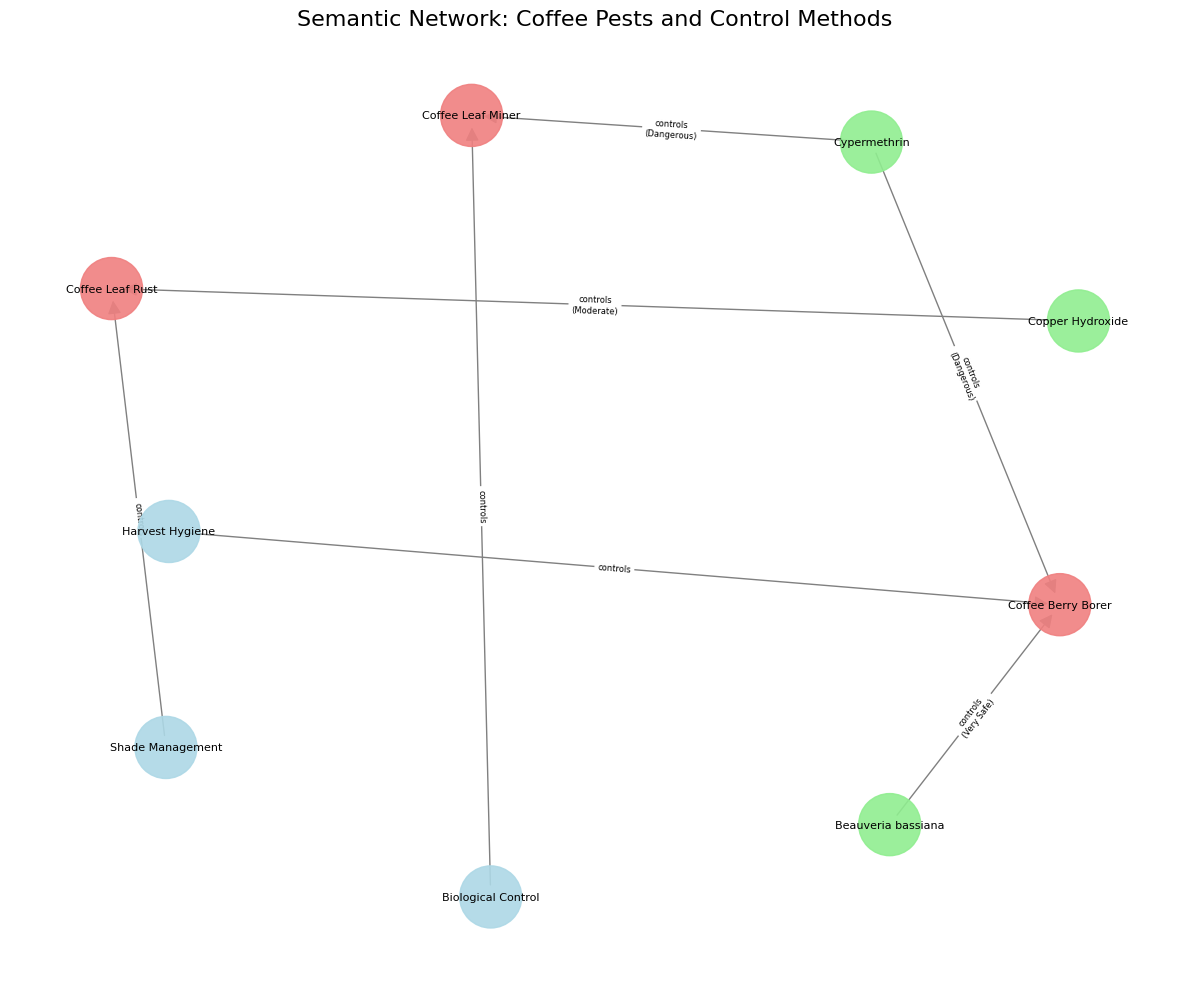


Semantic Network Statistics:
Nodes: 9
Edges: 7
Graph Density: 0.097


In [23]:
# Run the complete demonstration
advisor = demonstrate_system()

 7. Interactive User Interface

In [24]:
def run_interactive_session():
    """Run an interactive session for user queries"""
    advisor = InteractivePestAdvisor()
    
    while True:
        print("\n" + "=" * 50)
        print("COFFEE PEST MANAGEMENT ADVISOR")
        print("=" * 50)
        print("1. Diagnose pests from symptoms")
        print("2. View knowledge base summary") 
        print("3. Visualize semantic network")
        print("4. Exit")
        
        choice = input("\nSelect option (1-4): ").strip()
        
        if choice == '1':
            advisor.diagnose_and_recommend()
        elif choice == '2':
            advisor.display_knowledge_base_summary()
        elif choice == '3':
            advisor.visualize_semantic_network()
        elif choice == '4':
            print("Thank you for using the Coffee Pest Management Advisor!")
            break
        else:
            print("Invalid option. Please try again.")



COFFEE PEST MANAGEMENT ADVISOR
1. Diagnose pests from symptoms
2. View knowledge base summary
3. Visualize semantic network
4. Exit

=== PEST DIAGNOSIS AND RECOMMENDATION SYSTEM ===

Describe the symptoms you're observing (comma-separated):
Example: holes in berries, orange powder on leaves, leaf mining
No pests identified from the provided symptoms.

COFFEE PEST MANAGEMENT ADVISOR
1. Diagnose pests from symptoms
2. View knowledge base summary
3. Visualize semantic network
4. Exit
=== COFFEE PEST KNOWLEDGE BASE ===
Pests: 3
Pesticides: 3
Control Methods: 3

Available Pests:
  - Coffee Berry Borer (Insect)
  - Coffee Leaf Rust (Fungus)
  - Coffee Leaf Miner (Insect)

COFFEE PEST MANAGEMENT ADVISOR
1. Diagnose pests from symptoms
2. View knowledge base summary
3. Visualize semantic network
4. Exit


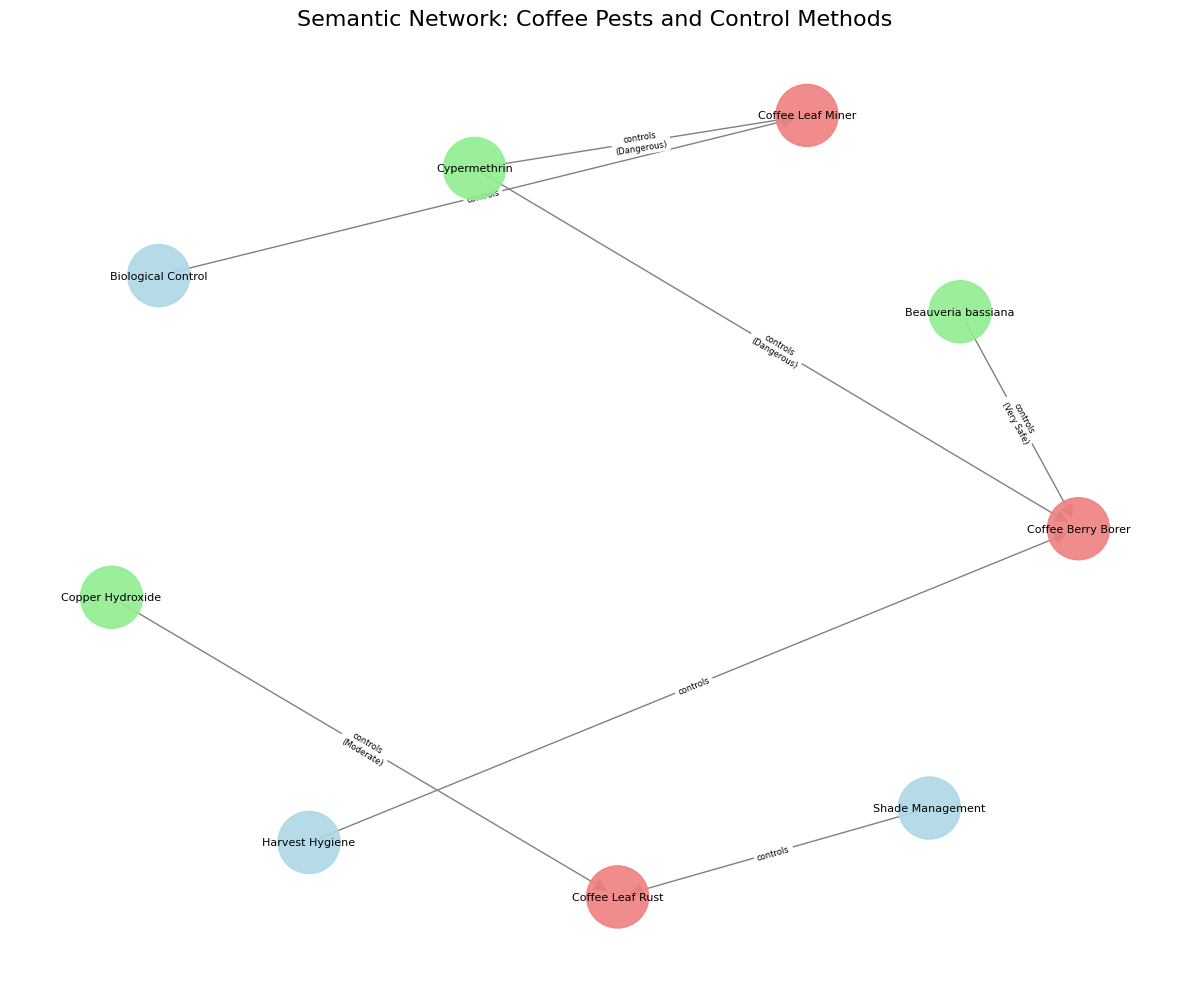


Semantic Network Statistics:
Nodes: 9
Edges: 7
Graph Density: 0.097

COFFEE PEST MANAGEMENT ADVISOR
1. Diagnose pests from symptoms
2. View knowledge base summary
3. Visualize semantic network
4. Exit
Thank you for using the Coffee Pest Management Advisor!


In [25]:
run_interactive_session()

8. Knowledge Base Queries and Inference Examples

In [26]:
def demonstrate_queries():
    """Demonstrate various knowledge base queries"""
    kb = CoffeePestKnowledgeBase()
    logic = PestManagementLogic(kb)
    
    print("=== KNOWLEDGE BASE QUERIES ===")
    
    # Query 1: Find all biological controls
    print("\n1. All Biological Controls:")
    bio_controls = [p for p in kb.pesticides.values() if p.control_type == ControlType.BIOLOGICAL]
    for control in bio_controls:
        print(f"   - {control.name}: {control.active_ingredient}")
    
    # Query 2: Find pests affecting leaves
    print("\n2. Pests that Affect Leaves:")
    leaf_pests = [p for p in kb.pests.values() if "Leaf" in p.affected_parts]
    for pest in leaf_pests:
        print(f"   - {pest.name}: {', '.join(pest.symptoms[:2])}")
    
    # Query 3: Find safe pesticides (Safety Level: Very Safe)
    print("\n3. Very Safe Pesticides:")
    safe_pesticides = [p for p in kb.pesticides.values() if p.safety_level == SafetyLevel.VERY_SAFE]
    for pesticide in safe_pesticides:
        print(f"   - {pesticide.name}: {pesticide.toxicity_notes}")
    
    # Query 4: Demonstrate complex reasoning
    print("\n4. Integrated Pest Management Strategy for Coffee Berry Borer:")
    cbb_recommendations = logic.recommend_safe_first("coffee_berry_borer")
    for rec in cbb_recommendations:
        if rec['type'] == 'method':
            method = kb.control_methods[rec['id']]
            print(f"   - {method.name} ({method.control_type.value}): {method.description}")
        else:
            pesticide = kb.pesticides[rec['id']]
            print(f"   - {pesticide.name}: {pesticide.active_ingredient}")


In [27]:
demonstrate_queries()

=== KNOWLEDGE BASE QUERIES ===

1. All Biological Controls:
   - Beauveria bassiana: Beauveria bassiana fungus

2. Pests that Affect Leaves:
   - Coffee Leaf Rust: Orange powder on leaf underside, Leaf yellowing
   - Coffee Leaf Miner: Winding tunnels in leaves, Leaf necrosis

3. Very Safe Pesticides:
   - Beauveria bassiana: Safe for humans, bees, and beneficial insects

4. Integrated Pest Management Strategy for Coffee Berry Borer:
   - Harvest Hygiene (Cultural): Remove all berries during harvest including fallen ones
   - Beauveria bassiana: Beauveria bassiana fungus


# ## 9. Assignment Summary
# 
# This implementation demonstrates key KR&R concepts:
# 
# ### **Knowledge Representation:**
# - **Ontology**: Formal class hierarchies (Pest, Pesticide, ControlMethod)
# - **Semantic Network**: Graph structure showing relationships between entities
# - **Frames**: Structured data representations using dataclasses
# 
# ### **Reasoning:**
# - **First-Order Logic Rules**: Implemented as Python methods
# - **Rule-based System**: Safe-first recommendation strategy
# - **Inference**: Symptom-based diagnosis and control recommendation
# 
# ### **Key Features:**
# 1. **Formal KR**: Explicit ontology with defined relationships
# 2. **Multiple Reasoning Strategies**: FOL rules, semantic queries, interactive diagnosis
# 3. **Visualization**: Semantic network graph
# 4. **Practical Application**: Real-world coffee pest management
# 5. **Extensibility**: Easy to add new pests, pesticides, and rules

In [28]:
# Final system summary
def print_system_summary():
    kb = CoffeePestKnowledgeBase()
    
    print("=== SYSTEM SUMMARY ===")
    print(f"Knowledge Base Statistics:")
    print(f"• Pests: {len(kb.pests)}")
    print(f"• Pesticides: {len(kb.pesticides)}")
    print(f"• Control Methods: {len(kb.control_methods)}")
    print(f"• Semantic Network Nodes: {kb.semantic_network.number_of_nodes()}")
    print(f"• Semantic Network Edges: {kb.semantic_network.number_of_edges()}")
    
    print("\nFirst-Order Logic Rules Implemented:")
    print("1. ∀pest ∀control (Pest(pest) ∧ Controls(control, pest) ∧ Safe(control) → RecommendedFirst(control))")
    print("2. ∀pesticide ∀pest (Pesticide(pesticide) ∧ Controls(pesticide, pest) ∧ Dangerous(pesticide) → LastResort(pesticide))") 
    print("3. ∀symptoms ∃pest (Exhibits(pest, symptoms) → Identified(pest))")
    
    

print_system_summary()

=== SYSTEM SUMMARY ===
Knowledge Base Statistics:
• Pests: 3
• Pesticides: 3
• Control Methods: 3
• Semantic Network Nodes: 9
• Semantic Network Edges: 7

First-Order Logic Rules Implemented:
1. ∀pest ∀control (Pest(pest) ∧ Controls(control, pest) ∧ Safe(control) → RecommendedFirst(control))
2. ∀pesticide ∀pest (Pesticide(pesticide) ∧ Controls(pesticide, pest) ∧ Dangerous(pesticide) → LastResort(pesticide))
3. ∀symptoms ∃pest (Exhibits(pest, symptoms) → Identified(pest))
